# MLB CSV FILES Milestone 2

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
batting2023 = pd.read_csv('/Users/andrewpfeifer/Documents/DSC540/DSC540_project/archive-9/2023_MLB_Player_Stats-Batting.csv', sep = ';', encoding='unicode_escape')
pitching2023 = pd.read_csv('/Users/andrewpfeifer/Documents/DSC540/DSC540_project/archive-9/2023 MLB Player Stats - Pitching.csv', sep = ';', encoding='unicode_escape')

In [4]:
batting2023.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,1,CJ Abrams*,22,WSN,NL,89,340,316,47,82,...,0.306,0.434,0.739,105,137,5,8,3,0,0
1,2,José Abreu,36,HOU,AL,95,400,368,33,90,...,0.293,0.353,0.646,79,130,11,3,0,5,1
2,3,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,...,0.408,0.578,0.986,160,226,7,4,0,2,2
3,4,Willy Adames,27,MIL,NL,89,383,336,44,71,...,0.291,0.411,0.702,90,138,9,3,0,5,0
4,5,Riley Adams,27,WSN,NL,23,87,79,4,22,...,0.337,0.506,0.844,133,40,4,1,1,0,0


In [5]:
pitching2023.head()

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Fernando Abad*,37,COL,NL,1,0,1.000,4.26,6,...,0,32,124,8.18,2.211,15.6,2.8,4.3,2.8,0.67
1,2,Andrew Abbott*,24,CIN,NL,5,2,0.714,2.10,9,...,0,213,226,4.08,0.916,5.3,1.3,2.9,9.2,3.17
2,3,Cory Abbott,27,WSN,NL,0,1,0.000,5.49,10,...,1,85,77,5.83,1.475,9.2,1.8,4.1,7.3,1.78
3,4,Albert Abreu,27,NYY,AL,2,2,0.500,4.14,33,...,2,182,103,4.69,1.331,7.4,1.3,4.6,10.0,2.19
4,5,Bryan Abreu,26,HOU,AL,3,2,0.600,2.72,47,...,1,192,155,3.42,1.144,6.6,1.2,3.7,13.4,3.63


In [6]:
# Getting the inital size of the data sets.
batting2023.shape

(695, 29)

In [7]:
pitching2023.shape

(813, 35)

## Step 1: Removing unimportant columns

For this step I want to remove the columns that have no meaning for the end goal of the assingment. I only located 1 to remove which is rank and provides no value as it's only an index and both data frames have this.

In [9]:
# Using axis 1 will remove the identified column and doesn't affect the rows.
batting2023 = batting2023.drop(['Rk'], axis=1)

In [10]:
batting2023.head()

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,CJ Abrams*,22,WSN,NL,89,340,316,47,82,17,...,0.306,0.434,0.739,105,137,5,8,3,0,0
1,José Abreu,36,HOU,AL,95,400,368,33,90,16,...,0.293,0.353,0.646,79,130,11,3,0,5,1
2,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,26,...,0.408,0.578,0.986,160,226,7,4,0,2,2
3,Willy Adames,27,MIL,NL,89,383,336,44,71,16,...,0.291,0.411,0.702,90,138,9,3,0,5,0
4,Riley Adams,27,WSN,NL,23,87,79,4,22,5,...,0.337,0.506,0.844,133,40,4,1,1,0,0


In [11]:
pitching2023 = pitching2023.drop(['Rk'], axis=1)

In [13]:
pitching2023.head()

,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,Fernando Abad*,37,COL,NL,1,0,1.000,4.26,6,0,...,0,32,124,8.18,2.211,15.6,2.8,4.3,2.8,0.67
1,Andrew Abbott*,24,CIN,NL,5,2,0.714,2.10,9,9,...,0,213,226,4.08,0.916,5.3,1.3,2.9,9.2,3.17
2,Cory Abbott,27,WSN,NL,0,1,0.000,5.49,10,0,...,1,85,77,5.83,1.475,9.2,1.8,4.1,7.3,1.78
3,Albert Abreu,27,NYY,AL,2,2,0.500,4.14,33,0,...,2,182,103,4.69,1.331,7.4,1.3,4.6,10.0,2.19
4,Bryan Abreu,26,HOU,AL,3,2,0.600,2.72,47,0,...,1,192,155,3.42,1.144,6.6,1.2,3.7,13.4,3.63


## Step 2: Correct the name casing.

While reviewing the data I noticed there were some random capital letters in some names. To correct this I want to use title to correct them names. Using this makes the first letter capital and the rest lowercase.

In [15]:
# I'm saving over the the initial data set with the adjusted new one. Title will make the first letter of each word uppercase and the rest lower case.
batting2023['Name'] = batting2023['Name'].str.title()
batting2023.head()

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,Cj Abrams*,22,WSN,NL,89,340,316,47,82,17,...,0.306,0.434,0.739,105,137,5,8,3,0,0
1,José Abreu,36,HOU,AL,95,400,368,33,90,16,...,0.293,0.353,0.646,79,130,11,3,0,5,1
2,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,26,...,0.408,0.578,0.986,160,226,7,4,0,2,2
3,Willy Adames,27,MIL,NL,89,383,336,44,71,16,...,0.291,0.411,0.702,90,138,9,3,0,5,0
4,Riley Adams,27,WSN,NL,23,87,79,4,22,5,...,0.337,0.506,0.844,133,40,4,1,1,0,0


In [16]:
pitching2023['Name'] = pitching2023['Name'].str.title()
pitching2023.head()

,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,Fernando Abad*,37,COL,NL,1,0,1.000,4.26,6,0,...,0,32,124,8.18,2.211,15.6,2.8,4.3,2.8,0.67
1,Andrew Abbott*,24,CIN,NL,5,2,0.714,2.10,9,9,...,0,213,226,4.08,0.916,5.3,1.3,2.9,9.2,3.17
2,Cory Abbott,27,WSN,NL,0,1,0.000,5.49,10,0,...,1,85,77,5.83,1.475,9.2,1.8,4.1,7.3,1.78
3,Albert Abreu,27,NYY,AL,2,2,0.500,4.14,33,0,...,2,182,103,4.69,1.331,7.4,1.3,4.6,10.0,2.19
4,Bryan Abreu,26,HOU,AL,3,2,0.600,2.72,47,0,...,1,192,155,3.42,1.144,6.6,1.2,3.7,13.4,3.63


## Step 3: Add a new column to the data

Eventually this data set will be combined with the new 2024 set. To make them distinguished I'm adding a column to identify the year of the data.

In [17]:
# Using the method below will add the new column to the end of the data frame.
batting2023["Year"] = "2023"
batting2023.head()

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
0,Cj Abrams*,22,WSN,NL,89,340,316,47,82,17,...,0.434,0.739,105,137,5,8,3,0,0,2023
1,José Abreu,36,HOU,AL,95,400,368,33,90,16,...,0.353,0.646,79,130,11,3,0,5,1,2023
2,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,26,...,0.578,0.986,160,226,7,4,0,2,2,2023
3,Willy Adames,27,MIL,NL,89,383,336,44,71,16,...,0.411,0.702,90,138,9,3,0,5,0,2023
4,Riley Adams,27,WSN,NL,23,87,79,4,22,5,...,0.506,0.844,133,40,4,1,1,0,0,2023


In [18]:
pitching2023["Year"] = "2023"
pitching2023.head()

,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Year
0,Fernando Abad*,37,COL,NL,1,0,1.000,4.26,6,0,...,32,124,8.18,2.211,15.6,2.8,4.3,2.8,0.67,2023
1,Andrew Abbott*,24,CIN,NL,5,2,0.714,2.10,9,9,...,213,226,4.08,0.916,5.3,1.3,2.9,9.2,3.17,2023
2,Cory Abbott,27,WSN,NL,0,1,0.000,5.49,10,0,...,85,77,5.83,1.475,9.2,1.8,4.1,7.3,1.78,2023
3,Albert Abreu,27,NYY,AL,2,2,0.500,4.14,33,0,...,182,103,4.69,1.331,7.4,1.3,4.6,10.0,2.19,2023
4,Bryan Abreu,26,HOU,AL,3,2,0.600,2.72,47,0,...,192,155,3.42,1.144,6.6,1.2,3.7,13.4,3.63,2023


In [19]:
# Set a variable to contain the year column data by using pop.
first_column = batting2023.pop('Year') 

In [20]:
# Insert the saved column at index 0 so this information will be at the beginning of the data frame.
batting2023.insert(0, 'Year', first_column)

In [21]:
batting2023.head()

,Year,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,2023,Cj Abrams*,22,WSN,NL,89,340,316,47,82,...,0.306,0.434,0.739,105,137,5,8,3,0,0
1,2023,José Abreu,36,HOU,AL,95,400,368,33,90,...,0.293,0.353,0.646,79,130,11,3,0,5,1
2,2023,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,...,0.408,0.578,0.986,160,226,7,4,0,2,2
3,2023,Willy Adames,27,MIL,NL,89,383,336,44,71,...,0.291,0.411,0.702,90,138,9,3,0,5,0
4,2023,Riley Adams,27,WSN,NL,23,87,79,4,22,...,0.337,0.506,0.844,133,40,4,1,1,0,0


In [22]:
first_column = pitching2023.pop('Year') 

In [23]:
pitching2023.insert(0, 'Year', first_column) 

In [24]:
pitching2023.head()

,Year,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,2023,Fernando Abad*,37,COL,NL,1,0,1.000,4.26,6,...,0,32,124,8.18,2.211,15.6,2.8,4.3,2.8,0.67
1,2023,Andrew Abbott*,24,CIN,NL,5,2,0.714,2.10,9,...,0,213,226,4.08,0.916,5.3,1.3,2.9,9.2,3.17
2,2023,Cory Abbott,27,WSN,NL,0,1,0.000,5.49,10,...,1,85,77,5.83,1.475,9.2,1.8,4.1,7.3,1.78
3,2023,Albert Abreu,27,NYY,AL,2,2,0.500,4.14,33,...,2,182,103,4.69,1.331,7.4,1.3,4.6,10.0,2.19
4,2023,Bryan Abreu,26,HOU,AL,3,2,0.600,2.72,47,...,1,192,155,3.42,1.144,6.6,1.2,3.7,13.4,3.63


## Step 4: Check for duplicates

In this section I will check to see if there are duplicates in the data. By the end I will decide if I should keep them or remove them.

In [26]:
# Check for duplicates.
print("Are there any duplicated names in batting?: {}".format(any(batting2023.Name.duplicated())))

Are there any duplicated names in batting?: True


There are duplicates in the data. However I wasn't able to pull a list of the values. I checked the data in the CSV and determined that these are duplicates but the first occurance has the mean values for MLB. I'll remove the remaining values.

In [27]:
# Using inplace will overwrite the original data frame.
batting2023.drop_duplicates(subset=['Name'], inplace=True)

In [28]:
print("Are there any remaining duplicated names in batting?: {}".format(any(batting2023.Name.duplicated())))

Are there any remaining duplicated names in batting?: False


In [29]:
print("Are there any duplicated names in pitching?: {}".format(any(pitching2023.Name.duplicated())))

Are there any duplicated names in pitching?: True


In [30]:
pitching2023.drop_duplicates(subset=['Name'], inplace=True)

In [31]:
print("Are there any remaining duplicated names in pitching?: {}".format(any(pitching2023.Name.duplicated())))

Are there any remaining duplicated names in pitching?: False


## Step 5: Removing Outliers

For this step I'll check for outliers. For batting I will review the on base percentage. If the value is too high the player may have gotten on base once and was injured or only played 1 game in the season. If I average the 2023 and 2024 data this could fasley increase the percentage.

In [32]:
# The below will get the zcore for OBP of the batting data.
batting_Zscore = np.abs(stats.zscore(batting2023["OBP"]))

In [33]:
# Most of the OBP zscores were 1 or less. 2 seems to be the outlier. Anthing 2 and above are to be removed.
batting_no_outliers = batting2023[batting_Zscore < 2]

In [34]:
batting_no_outliers.shape

(563, 29)

Batting now 587 of the original 695 rows.

For pitching, the outliers I want to eliminate are low earned run average. This like batting could be a result of not many games played or innings pitched.

In [36]:
pitching_Zscore = np.abs(stats.zscore(pitching2023["ERA"]))

In [37]:
pitching_no_outliers = pitching2023[pitching_Zscore >= 0.06]

In [38]:
pitching_no_outliers.shape

(695, 35)

Pitching now has 695 rows of the initial 813.

In [160]:
CSVDat = pd.concat([batting_no_outliers, pitching_no_outliers], join="outer")
CSVDat.head()

,Year,Name,Age,Tm,Lg,G,PA,AB,R,H,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,2023,Cj Abrams*,22,WSN,NL,89,340.0,316.0,47,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,José Abreu,36,HOU,AL,95,400.0,368.0,33,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Ronald Acuna Jr.,25,ATL,NL,97,446.0,391.0,86,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Willy Adames,27,MIL,NL,89,383.0,336.0,44,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,Riley Adams,27,WSN,NL,23,87.0,79.0,4,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
batting_no_outliers.head()

,Year,Name,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,2023,Cj Abrams*,22,WSN,NL,89,340,316,47,82,...,0.306,0.434,0.739,105,137,5,8,3,0,0
1,2023,José Abreu,36,HOU,AL,95,400,368,33,90,...,0.293,0.353,0.646,79,130,11,3,0,5,1
2,2023,Ronald Acuna Jr.,25,ATL,NL,97,446,391,86,129,...,0.408,0.578,0.986,160,226,7,4,0,2,2
3,2023,Willy Adames,27,MIL,NL,89,383,336,44,71,...,0.291,0.411,0.702,90,138,9,3,0,5,0
4,2023,Riley Adams,27,WSN,NL,23,87,79,4,22,...,0.337,0.506,0.844,133,40,4,1,1,0,0


In [40]:
pitching_no_outliers.head()

,Year,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,2023,Fernando Abad*,37,COL,NL,1,0,1.000,4.26,6,...,0,32,124,8.18,2.211,15.6,2.8,4.3,2.8,0.67
1,2023,Andrew Abbott*,24,CIN,NL,5,2,0.714,2.10,9,...,0,213,226,4.08,0.916,5.3,1.3,2.9,9.2,3.17
3,2023,Albert Abreu,27,NYY,AL,2,2,0.500,4.14,33,...,2,182,103,4.69,1.331,7.4,1.3,4.6,10.0,2.19
4,2023,Bryan Abreu,26,HOU,AL,3,2,0.600,2.72,47,...,1,192,155,3.42,1.144,6.6,1.2,3.7,13.4,3.63
5,2023,Domingo Acevedo,29,OAK,AL,0,0,0.000,10.61,9,...,1,47,40,5.54,1.929,15.4,1.9,1.9,6.8,3.50


## Summary For Milestone 2

One ethical implication could be permission to use the data sets. I assumed I would have permission since the data was provided through kaggle. Since this site allows for contributions to projects I only assume that I'm free to use the data. I did review the CSV files for bias towards any team but I wans't able to locate any thing like this. Also, the participants in the data should have consented to this information being collected as information like has been provided to the public for a long time.

The changes I made to the data were to check for duplicates and outliers. The outliers that I located, I removed. The duplicates were removed as well since for each duplicate there was a row for the MLB average for the player. I removed the rank column since it didn't seem to provide insightful information. I added a year column for 2023. This will eventually be added to 2024 data and I want the new information to be distinguishable from the old. I've corrected the casing of the players names as I was locating capital letters within some names that shouldn't be there. I used the title method for this to keep each first letter of the name capital and the remaining lower case.

There don't seem to be any legal or regulatory guidlelines for my project topic. A risk associated with my transformations is that this could have an affect on the combined 2023-2024 averages. This could lead to false readings for projects completed with the data. i did make assumptions on the outliers. I pulled the z-scores and compared them to the the data. I chose values that were a rough estimate for the players that only played one game.

The Data i used was sourced through Kaggle. This is a credible site, but it does contain some bad data sets. With this one I compared it to other data sets that had similar information and the data seemed to be identical. Since this was the case the data should be valid for the project. MLB data is acquired in a ethical mannor. All the information obtain can be gathered by viewing game play. The only real ethical concern I have is the permission to use the data set. However, This can be mitigated by reviewing the terms of service from Kaggle to confirm if using the data for a project will violate any policy. However, I didn't locate anything citing that I would need to obtain permission from the author to use the data.

# MLB Webscraping Milestone 3

In [108]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from scipy import stats
from datetime import datetime

## Batting Data

In [193]:
url = "https://www.baseball-reference.com/leagues/majors/2024.shtml"

In [194]:
# Web page reutrns the reponse to the website. For example 200 is good but 403 means forbidden.
web_page = requests.get(url) 

In [195]:
# Soup gathers all the data on the web URL.
soup = BeautifulSoup(web_page.content, "html.parser") 

In [196]:
# Finds the tanle in the data based on the specified ID.
table = soup.find('table', attrs = {'id':'teams_standard_batting'})

In [197]:
# This loop will get the table data, tr would be the section and td is the data in each cell.
data = []
for row in table.find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    data.append(row_data)

In [198]:
# This is similar to the data loop but will obtain the header data on the webpage
headers = []
for row in table.find_all('tr'):
    row_data = []
    for cell in row.find_all('th'):
        row_data.append(cell.text)
    headers.append(row_data)

In [199]:
df = pd.DataFrame(data)

In [200]:
# This slice was taken as a list was received from the header data as it contains the team names.
row1 = headers[1:32]

In [201]:
# Header was a list of lists and at index 0 contains the majority of the header data.
header = headers[0]

In [202]:
# The first position in the data provided only an empty list.
del header[0]

In [203]:
df.columns = header
df.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,39,29.0,4.54,57,2159,1920,259,464,97,9,...,.381,.694,100,732,42,22,6,23,3,381
2,39,28.6,4.45,55,2071,1866,245,464,109,6,...,.405,.720,104,756,36,23,0,17,3,379
3,38,27.1,5.00,55,2076,1882,275,461,95,12,...,.434,.740,115,817,20,24,3,17,7,352
4,41,27.2,4.33,58,2199,1977,251,479,102,16,...,.401,.712,99,793,33,26,6,12,11,400


In [204]:
# The first and last 2 rows were empty. I removed them with the code below.
batting = df.iloc[1:-2, :]

In [205]:
# Since the teams list was a a list of lists, I needed to compress them into one list. The for loop goes through each list and adds the team name to a new list.
team_list = []

for xs in row1:
    for x in xs:
        team_list.append(x)

In [206]:
# I can insert the team column directly into the data at position 0, with the new column name and the teams list.
batting.insert(0, 'Team', team_list)

In [207]:
batting.head()

,Team,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
1,Arizona Diamondbacks,39,29.0,4.54,57,2159,1920,259,464,97,...,.381,.694,100,732,42,22,6,23,3,381
2,Atlanta Braves,39,28.6,4.45,55,2071,1866,245,464,109,...,.405,.720,104,756,36,23,0,17,3,379
3,Baltimore Orioles,38,27.1,5.00,55,2076,1882,275,461,95,...,.434,.740,115,817,20,24,3,17,7,352
4,Boston Red Sox,41,27.2,4.33,58,2199,1977,251,479,102,...,.401,.712,99,793,33,26,6,12,11,400
5,Chicago Cubs,40,28.2,4.28,58,2182,1923,248,438,81,...,.369,.677,93,709,32,30,4,20,8,393


## Pitching Data

In [208]:
url1 = "https://www.baseball-reference.com/leagues/majors/2024-standard-pitching.shtml"

In [209]:
web_page1 = requests.get(url1) 

In [210]:
soup1 = BeautifulSoup(web_page1.content, "html.parser") 

In [211]:
table2 = soup1.find('table', attrs = {'id':'teams_standard_pitching'})


In [212]:
data2 = []
for row in table2.find_all('tr'):
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    data2.append(row_data)

In [213]:
headers1 = []
for row in table2.find_all('tr'):
    row_data = []
    for cell in row.find_all('th'):
        row_data.append(cell.text)
    headers1.append(row_data)

In [214]:
df1 = pd.DataFrame(data2)

In [215]:
header1 = headers1[0]

In [216]:
del header1[0]

In [217]:
df1.columns = header1
df1.head()

,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,22,28.4,4.65,25,32,.439,4.33,57,57,57,...,2143,93,3.96,1.323,9.0,1.0,2.9,7.6,2.59,372
2,24,31.8,3.73,32,23,.582,3.44,55,55,53,...,2045,120,3.50,1.222,8.1,0.8,2.9,8.8,3.01,373
3,20,29.9,3.71,36,19,.655,3.29,55,55,55,...,2041,113,3.60,1.143,7.2,0.9,3.1,8.7,2.82,353
4,21,29.6,3.93,29,29,.500,3.32,58,58,57,...,2150,126,3.49,1.161,7.8,0.9,2.6,8.7,3.35,376


In [218]:
pitching = df1.iloc[1:-2, :]

In [219]:
row1 = headers1[1:32]

In [220]:
pitching_list = []

for xs in row1:
    for x in xs:
        pitching_list.append(x)

In [221]:
pitching.insert(0, 'Team', pitching_list)
pitching.head()

,Team,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
1,Arizona Diamondbacks,22,28.4,4.65,25,32,.439,4.33,57,57,...,2143,93,3.96,1.323,9.0,1.0,2.9,7.6,2.59,372
2,Atlanta Braves,24,31.8,3.73,32,23,.582,3.44,55,55,...,2045,120,3.50,1.222,8.1,0.8,2.9,8.8,3.01,373
3,Baltimore Orioles,20,29.9,3.71,36,19,.655,3.29,55,55,...,2041,113,3.60,1.143,7.2,0.9,3.1,8.7,2.82,353
4,Boston Red Sox,21,29.6,3.93,29,29,.500,3.32,58,58,...,2150,126,3.49,1.161,7.8,0.9,2.6,8.7,3.35,376
5,Chicago Cubs,24,28.9,4.47,28,30,.483,3.94,58,58,...,2202,104,3.90,1.287,8.3,1.1,3.3,9.0,2.69,411


## Combine Tables

### Step 1:

In [222]:
# The only step needed for this is to merge the data frames based on the team.
stats_2024_ = pd.merge(batting, pitching, on = "Team")
stats_2024_.head()

,Team,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,Arizona Diamondbacks,39,29.0,4.54,57,2159,1920,259,464,97,...,2143,93,3.96,1.323,9.0,1.0,2.9,7.6,2.59,372
1,Atlanta Braves,39,28.6,4.45,55,2071,1866,245,464,109,...,2045,120,3.50,1.222,8.1,0.8,2.9,8.8,3.01,373
2,Baltimore Orioles,38,27.1,5.00,55,2076,1882,275,461,95,...,2041,113,3.60,1.143,7.2,0.9,3.1,8.7,2.82,353
3,Boston Red Sox,41,27.2,4.33,58,2199,1977,251,479,102,...,2150,126,3.49,1.161,7.8,0.9,2.6,8.7,3.35,376
4,Chicago Cubs,40,28.2,4.28,58,2182,1923,248,438,81,...,2202,104,3.90,1.287,8.3,1.1,3.3,9.0,2.69,411


In [224]:
HTMLData = stats_2024_

The two data frames are combined in to one base on the team name. This was chosen as it should be the only variable in common among the data frames.

## Checking for Duplicates

### Step 1:

In [74]:
# The only step completed for this was to look for duplicate values on teams name to ensure no duplicates were made when combining the data frames. Since there are no duplicates, no action is needed.
duplicates = any(stats_2024.Team.duplicated())
duplicates

False

There are no Duplicates to remove. There is no further action needed.

## Checking for NA values

### Step 1:

In [75]:
# The only step completed for this was to look for NA values. Since there are no NA values, no action is needed.
print(stats_2024.isnull())

     Team   #Bat  BatAge    R/G    G_x     PA     AB    R_x    H_x     2B  \
0   False  False   False  False  False  False  False  False  False  False   
1   False  False   False  False  False  False  False  False  False  False   
2   False  False   False  False  False  False  False  False  False  False   
3   False  False   False  False  False  False  False  False  False  False   
4   False  False   False  False  False  False  False  False  False  False   
5   False  False   False  False  False  False  False  False  False  False   
6   False  False   False  False  False  False  False  False  False  False   
7   False  False   False  False  False  False  False  False  False  False   
8   False  False   False  False  False  False  False  False  False  False   
9   False  False   False  False  False  False  False  False  False  False   
10  False  False   False  False  False  False  False  False  False  False   
11  False  False   False  False  False  False  False  False  False  False   

There a no NA vlaues located in the output above. No action should be needed.

## Locating Outliers

### Step 1:

In [76]:
# Covert the games played strings to numeric values.
stats_2024['G_x'] = pd.to_numeric(stats_2024['G_x'])

### Step 2:

In [77]:
# Review the Zscores of the games played data.
game_Zscore = np.abs(stats.zscore(stats_2024['G_x']))
game_Zscore

0     0.313197
1     1.931384
2     1.931384
3     0.495896
4     0.495896
5     0.495896
6     0.313197
7     0.313197
8     1.122291
9     0.313197
10    0.495896
11    1.304989
12    0.313197
13    1.304989
14    0.495896
15    0.313197
16    0.313197
17    0.313197
18    1.304989
19    1.304989
20    0.495896
21    0.313197
22    2.114083
23    1.304989
24    0.495896
25    1.931384
26    0.495896
27    0.313197
28    1.122291
29    1.122291
30    0.313197
Name: G_x, dtype: float64

Based on the Zscore data we would have two variables as outliers. I would consider the ones as 2.5 ourliers. However, since this is a live data set I'm going to leave them in. The games played can still be updating so technically these shouldn't be outliers. 

## Adding a time Column to the data

### Step 1:

In [79]:
# now gets se the current date and time when this section of code is run.
now = datetime.now()
str(now)

'2024-05-31 22:31:14.091627'

### Step 2

In [80]:
# Insert the date and time information to the data frame at a chosen postion.
stats_2024.insert(1, 'Current As Of', str(now))
stats_2024.head()

,Team,Current As Of,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,Arizona Diamondbacks,2024-05-31 22:31:14.091627,39,29.0,4.46,56,2118,1884,250,455,...,2101,94,3.94,1.308,8.9,1.0,2.9,7.6,2.62,364
1,Atlanta Braves,2024-05-31 22:31:14.091627,39,28.6,4.46,54,2039,1838,241,458,...,2008,119,3.52,1.224,8.1,0.9,2.9,8.7,3.02,365
2,Baltimore Orioles,2024-05-31 22:31:14.091627,38,27.1,5.04,54,2038,1847,272,450,...,2005,111,3.60,1.143,7.2,0.9,3.1,8.7,2.85,345
3,Boston Red Sox,2024-05-31 22:31:14.091627,41,27.2,4.28,57,2162,1943,244,467,...,2112,125,3.48,1.164,7.9,0.9,2.6,8.7,3.34,368
4,Chicago Cubs,2024-05-31 22:31:14.091627,40,28.2,4.28,57,2143,1890,244,430,...,2163,104,3.88,1.280,8.3,1.1,3.3,8.9,2.73,404


## Making a pivot table based on W-L%

### step 1

In [81]:
# This function will make a pivot table of win loss percantages based on team. Below it displays non NA values to the corresponding teams. 
win_pivot = stats_2024.pivot(index = "Team", columns = "W-L%")
win_pivot.head()

Current As Of                                     \
W-L%                          .263 .351 .364 .375 .397 .411 .429 .439   
Team                                                                    
Arizona Diamondbacks           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Atlanta Braves                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Baltimore Orioles              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Boston Red Sox                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Chicago Cubs                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                       ... LOB_y            \
W-L%                                        .446 .464  ...  .534 .554 .574   
Team                                                   ...                   
Arizona Diamondbacks  2024-05-31 22:31:14.091627  NaN  ...   NaN  NaN  NaN   
Atlanta Braves                               NaN  NaN  ...   NaN  NaN  365   
Baltimore Orioles                            NaN  NaN  ...   NaN  NaN  NaN   
Boston Red Sox                               NaN  NaN  ...   NaN  NaN  NaN   
Chicago Cubs                                 NaN  NaN  ...   NaN  NaN  NaN   

                                                         
W-L%                 .589 .603 .621 .648 .661 .672 .684  
Team                                                     
Arizona Diamondbacks  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Atlanta Braves        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Baltimore Orioles     NaN  NaN  NaN  345  NaN  NaN  NaN  
Boston Red Sox        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Chicago Cubs          NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 1638 columns]

## Re-indexing and final data frame

In [82]:
# The only step needed for this is to set index to the column of teams.
final = stats_2024.set_index("Team")
final.head()

,Current As Of,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
Team,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,2024-05-31 22:31:14.091627,39,29.0,4.46,56,2118,1884,250,455,97,...,2101,94,3.94,1.308,8.9,1.0,2.9,7.6,2.62,364
Atlanta Braves,2024-05-31 22:31:14.091627,39,28.6,4.46,54,2039,1838,241,458,107,...,2008,119,3.52,1.224,8.1,0.9,2.9,8.7,3.02,365
Baltimore Orioles,2024-05-31 22:31:14.091627,38,27.1,5.04,54,2038,1847,272,450,93,...,2005,111,3.60,1.143,7.2,0.9,3.1,8.7,2.85,345
Boston Red Sox,2024-05-31 22:31:14.091627,41,27.2,4.28,57,2162,1943,244,467,98,...,2112,125,3.48,1.164,7.9,0.9,2.6,8.7,3.34,368
Chicago Cubs,2024-05-31 22:31:14.091627,40,28.2,4.28,57,2143,1890,244,430,79,...,2163,104,3.88,1.280,8.3,1.1,3.3,8.9,2.73,404


## Summary For Milestone 3

Not many changes were needed to be done to the data. The data frames were scraped and combined into one data frame. I did check for outliers, but chose to take no action on them at the moment since there are still games being played and the website data is live. I've also checked for null values but wasn't able to locate any. After the data frames were combined into one I made sure no values ended up duplicating from this process. No duplicate values were located. A "Current as of" column as added to the data. This was added to ensure the user knows how current the data is. I re-indexed the data based on the team name since this looks cleaner. Lastly, I made a pivot table based on the teams win loss percentages.

Some regulatory guidlines for my project I've run into we're restricted websites. Some sites like ESPN or MLB blocked the python requests and marked the path as forbidden. These sites have set this restriction to prevent people from using the statistics for buisness use. However, they do allow them for personal use, but I didn't know how to show I wanted it for personal use. There should be no risk with the tranformations. I've only needed to make minor adjustments to the data frame. However, with the columns being added from both data frames, I could have duplicate columns.

My data set is relativley large. I did assume that there were no NA values, but only by reviewing the outputted table. There were many columns that didn't show and were unable to verify. ESPN and MLB are creditable sources to obtain MLB statistics. I did cross reference the Baseball reference site (Rotowire.com) to verify that the values matched for the teams.

The only website that I could locate with free use MLB statistics was on Rotowire. Since this is provided for free use there was no ethical lines crossed to obtian the data. I did run into other sites as previously stated, that was forbidding me use of the statistics on their sites. The only way to mitigate this issue was to locate a web site that was free use and was still credible.

# Milestone 4 API data

In [280]:
import requests
import pandas as pd
import http.client
import json
from datetime import datetime

In [281]:
# This will open the file the api key is in, so we can keep it d1screte.
with open('RapidAPI.json') as f:
    keys = json.load(f)
    key = keys['Rapidapi']

In [282]:
# The URL for the API will be hard coded in the data.
url = "https://tank01-mlb-live-in-game-real-time-statistics.p.rapidapi.com/getMLBTeams"
# This states optional on the API but ends up being required.
querystring = {"teamStats":"true","topPerformers":"true"}
# I needed to use the headers method As the API wsn't coming out correctly. Mostliket due to the URL set up.
headers = {"X-RapidAPI-Key": key,"X-RapidAPI-Host": "tank01-mlb-live-in-game-real-time-statistics.p.rapidapi.com"}
# response will hold the parse for the full api call.
response = requests.get(url, headers=headers, params=querystring)

In [283]:
# We will need to store the data as a json object.
data = response.json()

In [258]:
teamData=[]

In [259]:
# A list was made to hold all the data indices. There were only two and we only need to add the second one to the list that holds the data.
for i in data.items():
    #print(i[1])
    teamData.append(i[1])

In [260]:
# I needed to set a column variable, this one only took one variable.
teamDat = pd.DataFrame(teamData, columns = ["k"])
teamDat

,k
0,200
1,"[{'teamAbv': 'ARI', 'teamCity': 'Arizona', 'RS..."


In [261]:
# Explode flattens the list of the objects.
ex = teamDat.explode('k')

In [262]:
# To make the dta frame we need to normalize the data, load it as json, send it to json with the orientation of a record.
current = pd.json_normalize(json.loads(ex.to_json(orient="records")))

In [263]:
# next we need to check the headers for accuracy.
headers = list(current.columns.values)

In [264]:
# Due to the explode method all columns start with a K. We will need to remove it from all columns.
stats2024 = current.rename(columns = {'k':'k', 'k.teamAbv':'teamAbv','k.teamCity':'teamCity','k.RS':'RS','k.loss':'loss',
                           'k.teamName':"teamName",'k.mlbLogo1':'mlbLogo1','k.DIFF':'DIFF','k.teamID':'teamID',
                           'k.division':'division','k.RA':'RA','k.conferenceAbv':'conferenceAbv',
                           'k.espnLogo1':'espnLogo1','k.wins':'wins','k.conference':'conference',
                           'k.topPerformers.Pitching.BB.total':'topPerformers.Pitching.BB.total',
                           'k.topPerformers.Pitching.BB.playerID':'topPerformers.Pitching.BB.playerID',
                           'k.topPerformers.Pitching.Balk.total':'topPerformers.Pitching.Balk.total',
                           'k.topPerformers.Pitching.Balk.playerID':'topPerformers.Pitching.Balk.playerID',
                           'k.topPerformers.Pitching.Wild Pitch.total':'topPerformers.Pitching.Wild Pitch.total',
                           'k.topPerformers.Pitching.Wild Pitch.playerID':'topPerformers.Pitching.Wild Pitch.playerID',
                           'k.topPerformers.Pitching.Flyouts.total':'topPerformers.Pitching.Flyouts.total',
                           'k.topPerformers.Pitching.Flyouts.playerID':'topPerformers.Pitching.Flyouts.playerID',
                           'k.topPerformers.Pitching.BlownSave.total':'topPerformers.Pitching.BlownSave.total',
                           'k.topPerformers.Pitching.BlownSave.playerID':'topPerformers.Pitching.BlownSave.playerID',
                           'k.topPerformers.Pitching.Loss.total':'topPerformers.Pitching.Loss.total',
                           'k.topPerformers.Pitching.Loss.playerID':'topPerformers.Pitching.Loss.playerID',
                           'k.topPerformers.Pitching.H.total':'topPerformers.Pitching.H.total',
                           'k.topPerformers.Pitching.H.playerID':'topPerformers.Pitching.H.playerID',
                           'k.topPerformers.Pitching.HR.total':'topPerformers.Pitching.HR.total',
                           'k.topPerformers.Pitching.HR.playerID':'topPerformers.Pitching.HR.playerID',
                           'k.topPerformers.Pitching.ER.total':'topPerformers.Pitching.ER.total',
                           'k.topPerformers.Pitching.ER.playerID':'topPerformers.Pitching.ER.playerID',
                           'k.topPerformers.Pitching.Strikes.total':'topPerformers.Pitching.Strikes.total',
                           'k.topPerformers.Pitching.Strikes.playerID':'topPerformers.Pitching.Strikes.playerID',
                           'k.topPerformers.Pitching.WHIP.total':'topPerformers.Pitching.WHIP.total',
                           'k.topPerformers.Pitching.WHIP.playerID':'topPerformers.Pitching.WHIP.playerID',
                           'k.topPerformers.Pitching.Groundouts.total':'topPerformers.Pitching.Groundouts.total',
                           'k.topPerformers.Pitching.Groundouts.playerID':'topPerformers.Pitching.Groundouts.playerID',
                           'k.topPerformers.Pitching.R.total':'topPerformers.Pitching.R.total',
                           'k.topPerformers.Pitching.R.playerID':'topPerformers.Pitching.R.playerID',
                           'k.topPerformers.Pitching.Save.total':'topPerformers.Pitching.Save.total',
                           'k.topPerformers.Pitching.Save.playerID':'topPerformers.Pitching.Save.playerID',
                           'k.topPerformers.Pitching.Batters Faced.total':'topPerformers.Pitching.Batters Faced.total',
                           'k.topPerformers.Pitching.Batters Faced.playerID':'topPerformers.Pitching.Batters Faced.playerID',
                           'k.topPerformers.Pitching.SO.total':'topPerformers.Pitching.SO.total',
                           'k.topPerformers.Pitching.SO.playerID':'topPerformers.Pitching.SO.playerID',
                           'k.topPerformers.Pitching.Win.total':'topPerformers.Pitching.Win.total',
                           'k.topPerformers.Pitching.Win.playerID':'topPerformers.Pitching.Win.playerID',
                           'k.topPerformers.Pitching.Hold.total':'topPerformers.Pitching.Hold.total',
                           'k.topPerformers.Pitching.Hold.playerID':'topPerformers.Pitching.Hold.playerID',
                           'k.topPerformers.Pitching.Pitches.total': 'topPerformers.Pitching.Pitches.total',
                           'k.topPerformers.Pitching.Pitches.playerID': 'topPerformers.Pitching.Pitches.playerID',
                           'k.topPerformers.BaseRunning.CS.total':'topPerformers.BaseRunning.CS.total',
                           'k.topPerformers.BaseRunning.CS.playerID':'topPerformers.BaseRunning.CS.playerID',
                           'k.topPerformers.BaseRunning.SB.total':'topPerformers.BaseRunning.SB.total',
                           'k.topPerformers.BaseRunning.SB.playerID':'topPerformers.BaseRunning.SB.playerID',
                           'k.topPerformers.BaseRunning.PO.total':'topPerformers.BaseRunning.PO.total',
                           'k.topPerformers.BaseRunning.PO.playerID':'topPerformers.BaseRunning.PO.playerID',
                           'k.topPerformers.Fielding.Passed Ball.total':'topPerformers.Fielding.Passed Ball.total',
                           'k.topPerformers.Fielding.Passed Ball.playerID':'topPerformers.Fielding.Passed Ball.playerID',
                           'k.topPerformers.Fielding.Outfield assists.total':'topPerformers.Fielding.Outfield assists.total',
                           'k.topPerformers.Fielding.Outfield assists.playerID':'topPerformers.Fielding.Outfield assists.playerID',
                           'k.topPerformers.Fielding.E.total': 'topPerformers.Fielding.E.total',
                           'k.topPerformers.Fielding.E.playerID': 'topPerformers.Fielding.E.playerID',
                           'k.topPerformers.Fielding.Pickoffs.total':'topPerformers.Fielding.Pickoffs.total',
                           'k.topPerformers.Fielding.Pickoffs.playerID':'topPerformers.Fielding.Pickoffs.playerID',
                           'k.topPerformers.Hitting.BB.total':'topPerformers.Hitting.BB.total',
                           'k.topPerformers.Hitting.BB.playerID':'topPerformers.Hitting.BB.playerID',
                           'k.topPerformers.Hitting.AB.total':'topPerformers.Hitting.AB.total',
                           'k.topPerformers.Hitting.AB.playerID':'topPerformers.Hitting.AB.playerID',
                           'k.topPerformers.Hitting.H.total': 'topPerformers.Hitting.H.total',
                           'k.topPerformers.Hitting.H.playerID':'topPerformers.Hitting.H.playerID',
                           'k.topPerformers.Hitting.IBB.total':'topPerformers.Hitting.IBB.total',
                           'k.topPerformers.Hitting.IBB.playerID':'topPerformers.Hitting.IBB.playerID',
                           'k.topPerformers.Hitting.HR.total':'topPerformers.Hitting.HR.total',
                           'k.topPerformers.Hitting.HR.playerID':'topPerformers.Hitting.HR.playerID',
                           'k.topPerformers.Hitting.TB.total':'topPerformers.Hitting.TB.total',
                           'k.topPerformers.Hitting.TB.playerID':'topPerformers.Hitting.TB.playerID',
                           'k.topPerformers.Hitting.3B.total':'topPerformers.Hitting.3B.total',
                           'k.topPerformers.Hitting.3B.playerID':'topPerformers.Hitting.3B.playerID',
                           'k.topPerformers.Hitting.GIDP.total':'topPerformers.Hitting.GIDP.total',
                           'k.topPerformers.Hitting.GIDP.playerID':'topPerformers.Hitting.GIDP.playerID',
                           'k.topPerformers.Hitting.2B.total':'topPerformers.Hitting.2B.total',
                           'k.topPerformers.Hitting.2B.playerID':'topPerformers.Hitting.2B.playerID',
                           'k.topPerformers.Hitting.R.total':'topPerformers.Hitting.R.total',
                           'k.topPerformers.Hitting.R.playerID': 'topPerformers.Hitting.R.playerID',
                           'k.topPerformers.Hitting.SF.total': 'topPerformers.Hitting.SF.total',
                           'k.topPerformers.Hitting.SF.playerID':'topPerformers.Hitting.SF.playerID',
                           'k.topPerformers.Hitting.avg.total':'topPerformers.Hitting.avg.total',
                           'k.topPerformers.Hitting.avg.playerID':'topPerformers.Hitting.avg.playerID',
                           'k.topPerformers.Hitting.SAC.total':'topPerformers.Hitting.SAC.total',
                           'k.topPerformers.Hitting.SAC.playerID':'topPerformers.Hitting.SAC.playerID',
                           'k.topPerformers.Hitting.HBP.total':'topPerformers.Hitting.HBP.total',
                           'k.topPerformers.Hitting.HBP.playerID': 'topPerformers.Hitting.HBP.playerID',
                           'k.topPerformers.Hitting.RBI.total':'topPerformers.Hitting.RBI.total',
                           'k.topPerformers.Hitting.RBI.playerID':'topPerformers.Hitting.RBI.playerID',
                           'k.topPerformers.Hitting.SO.total':'topPerformers.Hitting.SO.total',
                           'k.topPerformers.Hitting.SO.playerID':'topPerformers.Hitting.SO.playerID',
                           'k.teamStats.Pitching.BB':'teamStats.Pitching.BB',
                           'k.teamStats.Pitching.Balk':'teamStats.Pitching.Balk',
                           'k.teamStats.Pitching.Wild Pitch':'teamStats.Pitching.Wild Pitch',
                           'k.teamStats.Pitching.Flyouts':'teamStats.Pitching.Flyouts',
                           'k.teamStats.Pitching.BlownSave':'teamStats.Pitching.BlownSave',
                           'k.teamStats.Pitching.Loss':'teamStats.Pitching.Loss',
                           'k.teamStats.Pitching.H':'teamStats.Pitching.H',
                           'k.teamStats.Pitching.HR':'teamStats.Pitching.HR',
                           'k.teamStats.Pitching.ER':'teamStats.Pitching.ER',
                           'k.teamStats.Pitching.Strikes':'teamStats.Pitching.Strikes',
                           'k.teamStats.Pitching.WHIP':'teamStats.Pitching.WHIP',
                           'k.teamStats.Pitching.Groundouts':'teamStats.Pitching.Groundouts',
                           'k.teamStats.Pitching.R':'teamStats.Pitching.R',
                           'k.teamStats.Pitching.InningsPitched':'teamStats.Pitching.InningsPitched',
                           'k.teamStats.Pitching.Save':'teamStats.Pitching.Save',
                           'k.teamStats.Pitching.Batters Faced':'teamStats.Pitching.Batters Faced',
                           'k.teamStats.Pitching.SO':'teamStats.Pitching.SO',
                           'k.teamStats.Pitching.Win':'teamStats.Pitching.Win',
                           'k.teamStats.Pitching.Hold':'teamStats.Pitching.Hold',
                           'k.teamStats.Pitching.Pitches':'teamStats.Pitching.Pitches',
                           'k.teamStats.BaseRunning.CS':'teamStats.BaseRunning.CS',
                           'k.teamStats.BaseRunning.SB':'teamStats.BaseRunning.SB',
                           'k.teamStats.BaseRunning.PO':'teamStats.BaseRunning.PO',
                           'k.teamStats.Fielding.Passed Ball':'teamStats.Fielding.Passed Ball',
                           'k.teamStats.Fielding.Outfield assists':'teamStats.Fielding.Outfield assists',
                           'k.teamStats.Fielding.E':'teamStats.Fielding.E',
                           'k.teamStats.Fielding.Pickoffs':'teamStats.Fielding.Pickoffs',
                           'k.teamStats.Hitting.BB':'teamStats.Hitting.BB','k.teamStats.Hitting.AB':'teamStats.Hitting.AB',
                           'k.teamStats.Hitting.H':'teamStats.Hitting.H','k.teamStats.Hitting.IBB':'teamStats.Hitting.IBB',
                           'k.teamStats.Hitting.HR':'teamStats.Hitting.HR','k.teamStats.Hitting.TB':'teamStats.Hitting.TB',
                           'k.teamStats.Hitting.3B':'teamStats.Hitting.3B',
                           'k.teamStats.Hitting.GIDP':'teamStats.Hitting.GIDP',
                           'k.teamStats.Hitting.2B':'teamStats.Hitting.2B','k.teamStats.Hitting.R':'teamStats.Hitting.R',
                           'k.teamStats.Hitting.SF':'teamStats.Hitting.SF','k.teamStats.Hitting.avg':'teamStats.Hitting.avg',
                           'k.teamStats.Hitting.SAC':'teamStats.Hitting.SAC','k.teamStats.Hitting.HBP':'teamStats.Hitting.HBP',
                           'k.teamStats.Hitting.RBI':'teamStats.Hitting.RBI',
                           'k.teamStats.Hitting.SO':'teamStats.Hitting.SO'})

## Dropping columns and rows

Step one: Drop the the first row as it only contains the url call information.

In [265]:
# Just dropping an indice will remove the associated row.
stats2024 = stats2024.drop([0])

Step two: drop the first 5 columns and the 7. as this provides no significanct information.

In [266]:
stats2024.head()

,k,teamAbv,teamCity,RS,loss,teamName,mlbLogo1,DIFF,teamID,division,...,teamStats.Hitting.3B,teamStats.Hitting.GIDP,teamStats.Hitting.2B,teamStats.Hitting.R,teamStats.Hitting.SF,teamStats.Hitting.avg,teamStats.Hitting.SAC,teamStats.Hitting.HBP,teamStats.Hitting.RBI,teamStats.Hitting.SO
1,NaN,ARI,Arizona,259,32,Diamondbacks,https://www.mlbstatic.com/team-logos/team-cap-...,-6,1,West,...,9,42,97,259,23,.242,6,22,245,445
2,NaN,ATL,Atlanta,245,23,Braves,https://www.mlbstatic.com/team-logos/team-cap-...,40,2,East,...,6,36,109,245,17,.249,0,23,236,485
3,NaN,BAL,Baltimore,275,19,Orioles,https://www.mlbstatic.com/team-logos/team-cap-...,71,3,East,...,12,20,97,276,17,.243,3,25,267,453
4,NaN,BOS,Boston,257,29,Red Sox,https://www.mlbstatic.com/team-logos/team-cap-...,26,4,East,...,16,33,103,251,12,.242,6,26,243,559
5,NaN,CHC,Chicago,248,30,Cubs,https://www.mlbstatic.com/team-logos/team-cap-...,-11,5,Central,...,11,32,81,248,20,.228,4,30,232,508


In [267]:
# To remove the column we need to use axis 1 and can specify the columns to remove.
stats2024 = stats2024.drop(['k', 'teamAbv', 'teamCity', 'RS', 'loss', 'mlbLogo1'], axis=1)
stats2024.head()

,teamName,DIFF,teamID,division,RA,conferenceAbv,espnLogo1,wins,conference,topPerformers.Pitching.BB.total,...,teamStats.Hitting.3B,teamStats.Hitting.GIDP,teamStats.Hitting.2B,teamStats.Hitting.R,teamStats.Hitting.SF,teamStats.Hitting.avg,teamStats.Hitting.SAC,teamStats.Hitting.HBP,teamStats.Hitting.RBI,teamStats.Hitting.SO
1,Diamondbacks,-6,1,West,265,NL,https://a.espncdn.com/combiner/i?img=/i/teamlo...,25,National League,20,...,9,42,97,259,23,.242,6,22,245,445
2,Braves,40,2,East,205,NL,https://a.espncdn.com/combiner/i?img=/i/teamlo...,32,National League,23,...,6,36,109,245,17,.249,0,23,236,485
3,Orioles,71,3,East,204,AL,https://a.espncdn.com/combiner/i?img=/i/teamlo...,36,American League,21,...,12,20,97,276,17,.243,3,25,267,453
4,Red Sox,26,4,East,231,AL,https://a.espncdn.com/combiner/i?img=/i/teamlo...,30,American League,22,...,16,33,103,251,12,.242,6,26,243,559
5,Cubs,-11,5,Central,259,NL,https://a.espncdn.com/combiner/i?img=/i/teamlo...,28,National League,26,...,11,32,81,248,20,.228,4,30,232,508


Step three: we can also drop the conferencre abreviation and the ESPN logo.

In [268]:
stats2024 = stats2024.drop(['conferenceAbv', 'espnLogo1'], axis=1)
stats2024.tail()

,teamName,DIFF,teamID,division,RA,wins,conference,topPerformers.Pitching.BB.total,topPerformers.Pitching.BB.playerID,topPerformers.Pitching.Balk.total,...,teamStats.Hitting.3B,teamStats.Hitting.GIDP,teamStats.Hitting.2B,teamStats.Hitting.R,teamStats.Hitting.SF,teamStats.Hitting.avg,teamStats.Hitting.SAC,teamStats.Hitting.HBP,teamStats.Hitting.RBI,teamStats.Hitting.SO
26,Cardinals,-37,26,Central,252,27,National League,25,[502043],1,...,6,25,88,216,16,.235,9,25,203,475
27,Rays,-50,27,East,275,28,American League,18,[650644],1,...,7,39,82,225,11,.232,7,30,208,520
28,Rangers,-5,28,West,256,27,American League,24,[547179],1,...,8,39,76,251,11,.241,1,21,239,434
29,Blue Jays,-32,29,East,258,27,American League,25,[605135],1,...,7,47,95,225,14,.234,6,21,214,404
30,Nationals,-16,30,East,241,26,National League,26,[571578],1,...,4,33,86,223,15,.231,9,31,207,460


## Checking for duplicates among the teams and making sure they are punctuated the same.

Step 1: set the team name column equal to itself while having the new team name be in a title format.

In [100]:
# Title does exactly  it sounds with the first letter upper case of each word and the remaining lower case.
stats2024['teamName'] = stats2024['teamName'].str.title()

Step 2: we can use any to seach through the team names to see if any information is duplicated

In [101]:
# Sutting up a dupes variable house a boolean variable of whether there are duplicated values or not.
dupes = any(stats2024.teamName.duplicated())
dupes

False

Since there are no duplicated values, we don't need to remove anything

## Adding a new column

step 1: We will want to make a variable that has the current date an time in it.

In [102]:
# using datetime now will obtain the date and time from the moment the code is run.
now = datetime.now()
str(now)

'2024-05-31 22:42:55.192384'

Step 2: We will add the new column to the right of the team name and call it "current as of".

In [103]:
# This is a shortcut I found where we can set the location of the new column, set the column name and fill the new information in.
stats2024.insert(1, 'Current As Of', str(now))
stats2024.head()

,teamName,Current As Of,DIFF,teamID,division,RA,wins,conference,topPerformers.Pitching.BB.total,topPerformers.Pitching.BB.playerID,...,teamStats.Hitting.3B,teamStats.Hitting.GIDP,teamStats.Hitting.2B,teamStats.Hitting.R,teamStats.Hitting.SF,teamStats.Hitting.avg,teamStats.Hitting.SAC,teamStats.Hitting.HBP,teamStats.Hitting.RBI,teamStats.Hitting.SO
1,Diamondbacks,2024-05-31 22:42:55.192384,-6,1,West,265,25,National League,20,[686826],...,9,42,97,250,23,.242,6,21,236,436
2,Braves,2024-05-31 22:42:55.192384,40,2,East,205,32,National League,23,[450203],...,6,36,107,241,15,.250,0,23,232,479
3,Orioles,2024-05-31 22:42:55.192384,71,3,East,204,36,American League,21,[680570],...,12,20,95,273,17,.241,3,25,264,447
4,Red Sox,2024-05-31 22:42:55.192384,23,4,East,228,29,American League,22,[676710],...,16,32,99,244,12,.240,6,25,236,551
5,Cubs,2024-05-31 22:42:55.192384,-11,5,Central,259,28,National League,23,[665871],...,11,31,79,244,20,.228,4,28,228,503


## Binning the DIFF data:

Step 1: Convert the DIFF column into numeric values using to_numeric.

In [104]:
#To numeric will make the values numeric and doesn't matter if it's a float or integer in a string form.
stats2024["DIFF"] = pd.to_numeric(stats2024["DIFF"])

Step 2: Depending if the DIFF value is positive or negative well. have this reflected in the data. If x is greater than 0 it's positive, less than 0 is negative, else it's unchanged.

In [105]:
# Lambda is a place holder for the value we're passing into the the if statement.
stats2024["DIFF"] = stats2024["DIFF"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Unchanged")

In [106]:
stats2024.head()

,teamName,Current As Of,DIFF,teamID,division,RA,wins,conference,topPerformers.Pitching.BB.total,topPerformers.Pitching.BB.playerID,...,teamStats.Hitting.3B,teamStats.Hitting.GIDP,teamStats.Hitting.2B,teamStats.Hitting.R,teamStats.Hitting.SF,teamStats.Hitting.avg,teamStats.Hitting.SAC,teamStats.Hitting.HBP,teamStats.Hitting.RBI,teamStats.Hitting.SO
1,Diamondbacks,2024-05-31 22:42:55.192384,Negative,1,West,265,25,National League,20,[686826],...,9,42,97,250,23,.242,6,21,236,436
2,Braves,2024-05-31 22:42:55.192384,Positive,2,East,205,32,National League,23,[450203],...,6,36,107,241,15,.250,0,23,232,479
3,Orioles,2024-05-31 22:42:55.192384,Positive,3,East,204,36,American League,21,[680570],...,12,20,95,273,17,.241,3,25,264,447
4,Red Sox,2024-05-31 22:42:55.192384,Positive,4,East,228,29,American League,22,[676710],...,16,32,99,244,12,.240,6,25,236,551
5,Cubs,2024-05-31 22:42:55.192384,Negative,5,Central,259,28,National League,23,[665871],...,11,31,79,244,20,.228,4,28,228,503


## Re-indexing the data frame for final Data frame output

Step 1: We will need to use set_index to the team name. This will have it match the other data sets.

In [107]:
# We can make any clumn the index but the previous dataframes use the team name, I'll do this as well for consistency.
stats2024 = stats2024.set_index("teamName")
stats2024.head()

,Current As Of,DIFF,teamID,division,RA,wins,conference,topPerformers.Pitching.BB.total,topPerformers.Pitching.BB.playerID,topPerformers.Pitching.Balk.total,...,teamStats.Hitting.3B,teamStats.Hitting.GIDP,teamStats.Hitting.2B,teamStats.Hitting.R,teamStats.Hitting.SF,teamStats.Hitting.avg,teamStats.Hitting.SAC,teamStats.Hitting.HBP,teamStats.Hitting.RBI,teamStats.Hitting.SO
teamName,,,,,,,,,,,,,,,,,,,,,
Diamondbacks,2024-05-31 22:42:55.192384,Negative,1,West,265,25,National League,20,[686826],1,...,9,42,97,250,23,.242,6,21,236,436
Braves,2024-05-31 22:42:55.192384,Positive,2,East,205,32,National League,23,[450203],1,...,6,36,107,241,15,.250,0,23,232,479
Orioles,2024-05-31 22:42:55.192384,Positive,3,East,204,36,American League,21,[680570],2,...,12,20,95,273,17,.241,3,25,264,447
Red Sox,2024-05-31 22:42:55.192384,Positive,4,East,228,29,American League,22,[676710],0,...,16,32,99,244,12,.240,6,25,236,551
Cubs,2024-05-31 22:42:55.192384,Negative,5,Central,259,28,National League,23,[665871],2,...,11,31,79,244,20,.228,4,28,228,503


In [270]:
API = stats2024

## Summary For Milestone 4

The changes made to the data consist of re-indexing, adding a column, removing a few columns and rows, binning the data, checking for duplicates and manipulating the headers. There are no legal or regulatory guidline for the data. I needed to pay for access to the information and that gave me the right to use it. DIFF if the run differential. The binning can cause a risk as we don't know how good or bad this differential is anymore. This could have an effect for pulling estimated win statistics. I didn't make assumptions when manipulating the data. I shose not to look for outliers since the data mostly has max score information. If i were to remove one outlie, I'd remove the entire team and don't want that. With regards to the credability of the API. I've seen on google there are some good and bad opinions of the site. However, when I shoce the api I chose the one that was verified. Considering the API sourced the data from the MLB API, I wouldn;t say it was obtained in an ethical way. The MLB site requires you to have an API key and I couldn't get a student access key for the site. It would appear they are sharing the MLB API access for profit. A good way to mitigate this would be to find a way to obtain the MLB API key directly from the source. I should have contacted customer service to work with them in setting up my own account.

# Milestone 5

## Adding the data to a dataframe

In [164]:
import sqlite3

In [161]:
CSVDat.head()

,Year,Name,Age,Tm,Lg,G,PA,AB,R,H,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,2023,Cj Abrams*,22,WSN,NL,89,340.0,316.0,47,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,José Abreu,36,HOU,AL,95,400.0,368.0,33,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Ronald Acuna Jr.,25,ATL,NL,97,446.0,391.0,86,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Willy Adames,27,MIL,NL,89,383.0,336.0,44,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,Riley Adams,27,WSN,NL,23,87.0,79.0,4,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
HTMLData.head()

,Team,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,Arizona Diamondbacks,39,29.0,4.54,57,2159,1920,259,464,97,...,2143,93,3.96,1.323,9.0,1.0,2.9,7.6,2.59,372
1,Atlanta Braves,39,28.6,4.45,55,2071,1866,245,464,109,...,2045,120,3.50,1.222,8.1,0.8,2.9,8.8,3.01,373
2,Baltimore Orioles,38,27.1,5.00,55,2076,1882,275,461,95,...,2041,113,3.60,1.143,7.2,0.9,3.1,8.7,2.82,353
3,Boston Red Sox,41,27.2,4.33,58,2199,1977,251,479,102,...,2150,126,3.49,1.161,7.8,0.9,2.6,8.7,3.35,376
4,Chicago Cubs,40,28.2,4.28,58,2182,1923,248,438,81,...,2202,104,3.90,1.287,8.3,1.1,3.3,9.0,2.69,411


In [244]:
# Lists can't be added so I dropped the rows with lists.
API=API.drop(['topPerformers.Pitching.BB.playerID', 'topPerformers.Pitching.Balk.playerID'], axis=1)

In [272]:
# More rows had lists so I'm keeping the first 11 columns
API=df.iloc[:, 0:11]

In [274]:
# Dropping the empty first row.
API=API.drop([0])

In [275]:
API.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR
1,39,29.0,4.54,57,2159,1920,259,464,97,9,51
2,39,28.6,4.45,55,2071,1866,245,464,109,6,57
3,38,27.1,5.00,55,2076,1882,275,461,95,12,79
4,41,27.2,4.33,58,2199,1977,251,479,102,16,60
5,40,28.2,4.28,58,2182,1923,248,438,81,11,56


In [237]:
# Code below will create the database.
conn = sqlite3.connect("mlbdata.db")

In [238]:
# Pandas can be used to send the data frame to a SQLite DB in one shot.
CSVDat.to_sql(name="CSVdat", con=conn, if_exists='replace', index=False)

1258

In [239]:
# Commit the data to SQL
conn.commit()

In [240]:
HTMLData.to_sql(name="HTMLdat", con=conn, if_exists='replace', index=False)

31

In [241]:
conn.commit()

In [276]:
API.to_sql(name="APIdat", con=conn, if_exists='replace', index=False)

33

In [278]:
conn.commit()

In [279]:
cursor = conn.cursor()

In [ ]:
# To combine the tables I'm doing this in two steps. I'll first join the API and HTML data
table1 = cursor.execute("SELECT * FROM HTMLdat OUTER JOIN APIdat ON HTMLDat.BatAge = APIdat.BatAge)

In [ ]:
# The Master Table holds all three merged tables.
master_table = cursor.execute("SELECT * FROM CSVdat OUTER JOIN table1 ON CSVdat.Tm = table1.Team)

## Visualizarions

In [285]:
import matplotlib.pyplot as plt

### Histogram of Whip

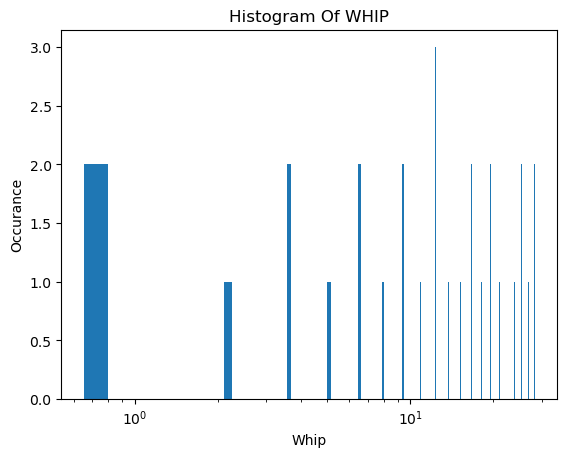

In [323]:
plt.hist(HTMLData.WHIP, rwidth=0.1, bins=20)
plt.title("Histogram Of WHIP")
plt.xlabel("Whip")
plt.ylabel("Occurance")
plt.xscale('log')

### Comparison between Atlanta RBI VS all of 2024

In [309]:
#subsetting the Atlanta data
ATL = CSVDat[CSVDat.Tm == 'ATL']

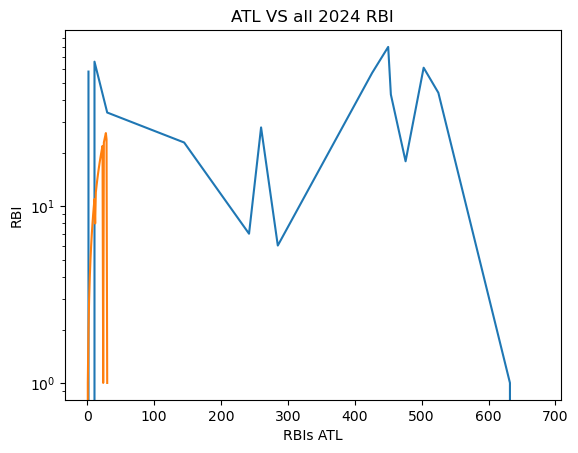

In [349]:
plt.plot(ATL.RBI)
plt.plot(HTMLData.RBI)
plt.title("ATL VS all 2024 RBI")
plt.xlabel("RBIs ATL")
plt.ylabel("RBI")
plt.yscale('log')

The Atlanta RBI values in blue seem to be higher than the totals for 2024.

### Comparison of Baltimore at bats vs all of 2024

In [324]:
# Subsetting the Baltimore Data
BAL = CSVDat[CSVDat.Tm == 'BAL']

In [344]:
API_AB = API.AB

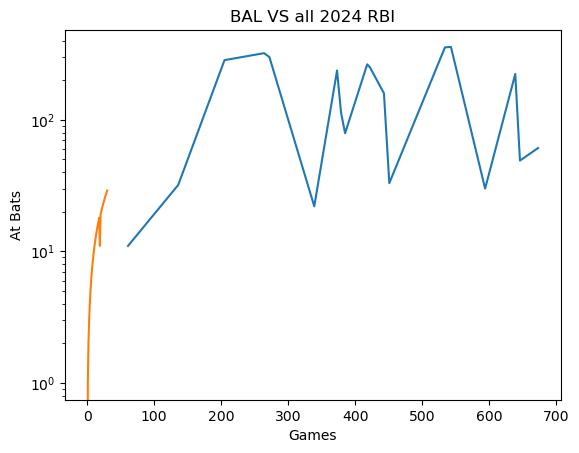

In [348]:
plt.plot(BAL.AB)
plt.plot(HTMLData.AB)
plt.title("BAL VS all 2024 At Bats")
plt.xlabel("Games")
plt.ylabel("At Bats Baltimore")
plt.yscale('log')

This is the Start of baseball season. This is shown with the at bats plot. The orange is 2024 and we can see we're at the start of the season.

### Scatter plot of PA and AB

Text(0, 0.5, 'At Bat')

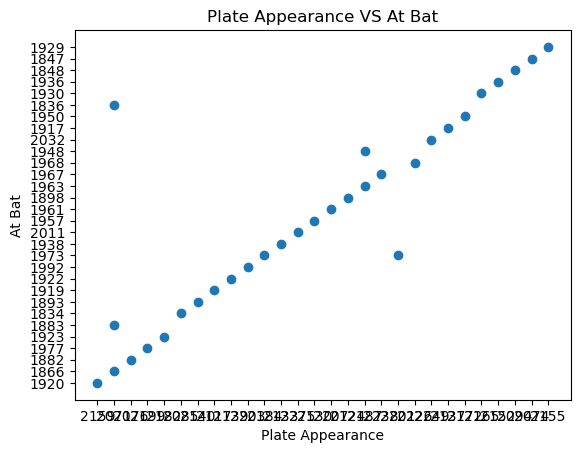

In [352]:
plt.scatter(HTMLData.PA, HTMLData.AB)
plt.title("Plate Appearance VS At Bat")
plt.xlabel("Plate Appearance")
plt.ylabel("At Bat")

Based on the scatter plot it would appear that the at bats and plate appearance linearly correlate.

### Histogram of Baltimore's Home runs

Text(0, 0.5, 'Occurance')

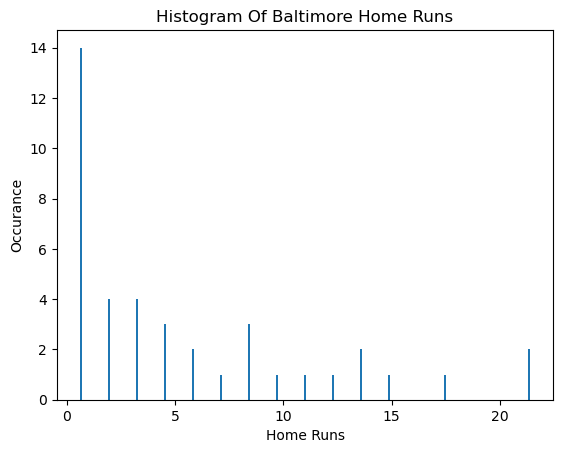

In [357]:
plt.hist(BAL.HR, rwidth=0.1, bins=17)
plt.title("Histogram Of Baltimore Home Runs")
plt.xlabel("Home Runs")
plt.ylabel("Occurance")